In [1]:
import numpy as np
import matplotlib.pyplot as plt
from color import blackbody
from color import loadspectrum
from cycler import cycler

nm = 1e-9

Figure 10.2(a)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


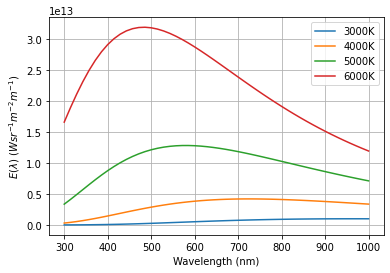

In [2]:
lam = np.linspace(300, 1000, 50)
for T in [3000, 4000, 5000, 6000]:
    e = blackbody(lam * nm, T)
    plt.plot(lam, e, label=f"{T}K")
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('$E(\lambda)\,\, (W sr^{-1} m^{-2} m^{-1})$')
plt.legend()
plt.savefig('fig10_2a.eps')

Figure 10.2(b), need to add human eye response

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


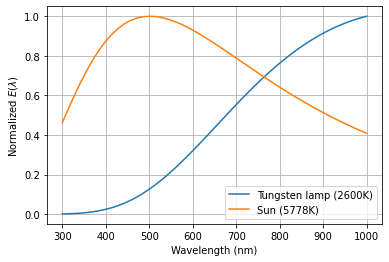

In [3]:
lam = np.linspace(300, 1000, 50)

e = blackbody(lam * nm, 2600)
plt.plot(lam, e / max(e), label="Tungsten lamp (2600K)")

e = blackbody(lam * nm, 5778)
plt.plot(lam, e / max(e), label="Sun (5778K)")

plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized $E(\lambda)$')
plt.legend()
plt.savefig('fig10_2b.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


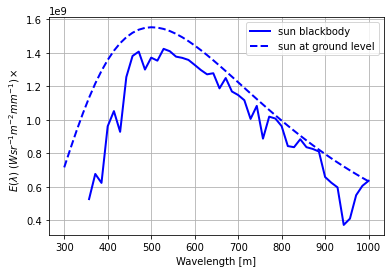

In [25]:
sun_ground = loadspectrum(lam * nm, 'data/solar')
sun_blackbody = blackbody(lam * nm, 5778)

test_cycler = (cycler(color=['b', 'b']) +
                  cycler(linestyle=['-', '--']))
plt.rc('lines', linewidth=2)
plt.rc('axes', prop_cycle=test_cycler)

fig, ax = plt.subplots()  # create a figure and an axes
ax.plot(lam, sun_ground.ir, label='sun blackbody')
ax.plot(lam, sun_blackbody / 1.7 * 1e-4, label='sun at ground level')
ax.set_prop_cycle(test_cycler)
# TODO: inconsistency between sun_ground and sun_blackbody
plt.grid(True)
plt.xlabel('Wavelength [m]')
plt.ylabel(r'$E(\lambda)\,\, (W sr^{-1} m^{-2} mm^{-1}) \times$')
plt.legend()
plt.savefig('fig10_3a.eps')

In [26]:
lam_water = np.linspace(400,700,30) 
water_spectrum = loadspectrum(lam_water * nm,'data/water')
d = 5.0
T = 10.0**(- water_spectrum.ir * d)

print(T)
# T = 10.^(-A*d), where A = water_spectrum.ir
# plot (lambda, T)


[[       nan]
 [       nan]
 [       nan]
 [       nan]
 [0.88574834]
 [0.87526171]
 [0.86489924]
 [0.85249071]
 [0.83282111]
 [0.79986601]
 [0.73448471]
 [0.65611922]
 [0.62356152]
 [0.58926459]
 [0.54073286]
 [0.47874411]
 [0.43983836]
 [0.37354663]
 [0.26039817]
 [0.13425517]
 [0.04917076]
 [0.04087735]
 [0.03483373]
 [0.02901718]
 [0.02316935]
 [0.01438627]
 [0.00881469]
 [0.00706766]
 [0.0042641 ]
 [0.00137721]]
